In [1]:
import streamlit as st

import base64
import pandas as pd

st.title("Cloud computing assisted mobile health care system")

def add_bg_from_local(image_file):
    with open(image_file, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
    st.markdown(
    f"""
    <style>
    .stApp {{
        background-image: url(data:image/{"png"};base64,{encoded_string.decode()});
        background-size: cover
    }}
    </style>
    """,
    unsafe_allow_html=True
    )
add_bg_from_local(r'C:\Users\Jerish Peter\Documents\Jerish_(FullBackup)_30.11\COde\1.jpg') 

def main_page():
    st.markdown("# Welcome !!!")
    st.sidebar.markdown("# Welcome !!!")

def doctor():
    st.markdown("Doctor !!!")
    addhos=st.button("ADD HOSPITAL")
    if addhos:
        from tkinter.filedialog import askopenfilename
        filename=askopenfilename()
        dataframe=pd.read_csv(filename)

        dataframe.to_csv('new file.csv')

    checkkrep=st.button("CHECK REPORTS")    
    if checkkrep:
     st.sucess("REPORT CHECKED SUCCESFULLY !!!")
        
    
def organi():
    st.markdown("Organization !!!")

2024-01-07 23:32:19.657 
  command:

    streamlit run C:\Users\Jerish Peter\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [2]:
#===================== IMPORT PACKAGES ==============================

import pandas as pd
from tkinter.filedialog import askopenfilename
import warnings
warnings.filterwarnings("ignore")
from sklearn import naive_bayes
import matplotlib.pyplot as plt


In [3]:
#============================= DATA SELECTION ==============================

#=== READ A INPUT ===

dataframe=pd.read_csv(r"C:\Users\Jerish Peter\Documents\Jerish_(FullBackup)_30.11\COde\Dataset.csv")

print()
print("--------------------------------------")
print("Input Data ")
print("--------------------------------------")
print()

print(dataframe.head(20))


--------------------------------------
Input Data 
--------------------------------------

    Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0              0       1         1          1   40       1       0   
1              0       0         0          0   25       1       0   
2              0       1         1          1   28       0       0   
3              0       1         0          1   27       0       0   
4              0       1         1          1   24       0       0   
5              0       1         1          1   25       1       0   
6              0       1         0          1   30       1       0   
7              0       1         1          1   25       1       0   
8              2       1         1          1   30       1       0   
9              0       0         0          1   24       0       0   
10             2       0         0          1   25       1       0   
11             0       1         1          1   34       1       0  

In [4]:
#============================= DATA PREPROCESSING ==============================

#=== CHECKING MISSING VALUES ====

print("--------------------------------------")
print("Checking Missing Values")
print("--------------------------------------")
print()
print(dataframe.isnull().sum())


--------------------------------------
Checking Missing Values
--------------------------------------

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Conditions              0
dtype: int64


In [5]:
#=========================== DATA SPLITTING ====================================

# x1=dataframe.drop('Conditions',axis=1)
x1=dataframe[['Diabetes_012','HighBP','HighChol','BMI','Smoker','Stroke','HeartDiseaseorAttack','Sex','Age']]
y1=dataframe['Conditions']

# === REPLACING ====

y1=y1.replace(4, 3)
y1=y1.replace(5, 2)
y1=y1.replace(6, 1)
y1=y1.replace(7, 3)
y1=y1.replace(8, 2)

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=0)

print("--------------------------------------")
print("Data Splitting           ")
print("--------------------------------------")
print()

print("Total no of data        :",dataframe.shape[0])
print("Total no of test data   :",X_test.shape[0])
print("Total no of train data  :",X_train.shape[0])


--------------------------------------
Data Splitting           
--------------------------------------

Total no of data        : 253680
Total no of test data   : 63420
Total no of train data  : 190260


--------------------------------------
Scatter Plot
--------------------------------------


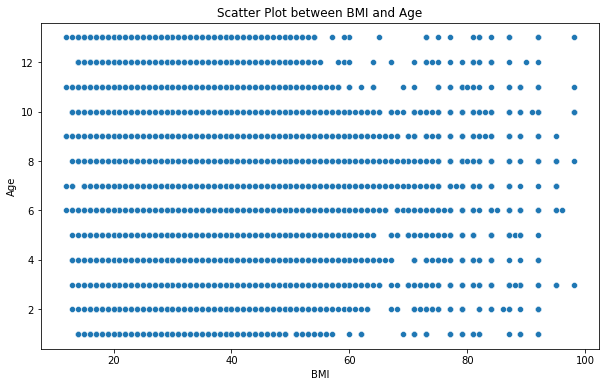

In [21]:
print("--------------------------------------")
print("Scatter Plot")
print("--------------------------------------")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Age', data=dataframe)
plt.title("Scatter Plot between BMI and Age")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

--------------------------------------
Pair Plot
--------------------------------------


<Figure size 864x576 with 0 Axes>

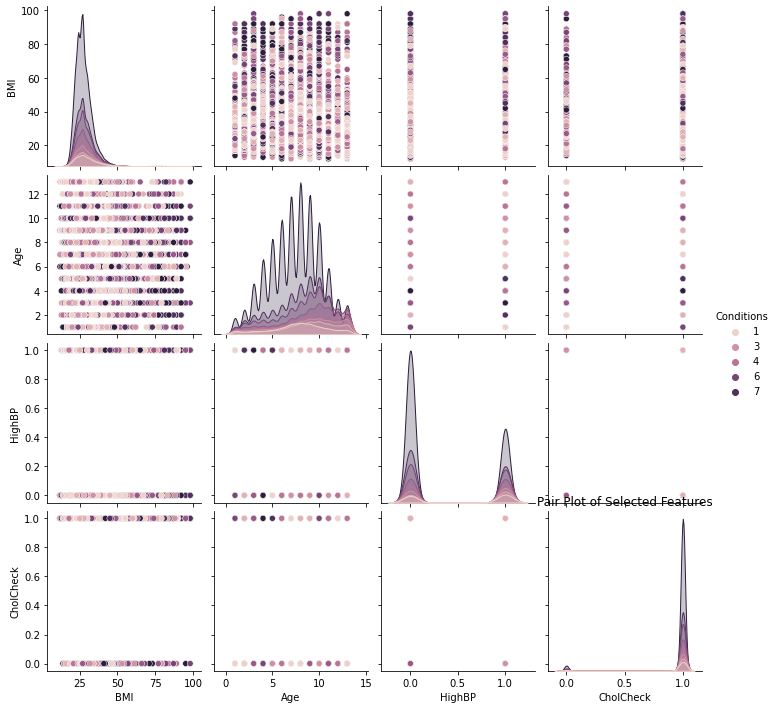

In [22]:
print("--------------------------------------")
print("Pair Plot")
print("--------------------------------------")

features_for_pairplot = ['BMI', 'Age', 'HighBP', 'CholCheck', 'Conditions']
plt.figure(figsize=(12, 8))
sns.pairplot(dataframe[features_for_pairplot], hue='Conditions', markers='o')
plt.title("Pair Plot of Selected Features")
plt.show()

-------------------------------------------------
Random Forest ---> Performance Analysis          
-------------------------------------------------

1.Accuracy  = 85.43351302785265 %

2.Precision = 79.07210422369288 %

3.Recall    = 92.90803240646501 %

4.F1-Score  = 85.43351302785265 %



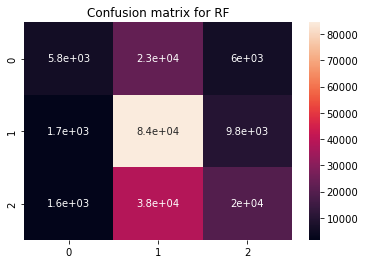

In [6]:
#=========================== CLASSIFICATION ====================================

# === RANDOM FOREST ===

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)  

pred_rf=rf.predict(X_train)

from sklearn import metrics

cm_rf=metrics.confusion_matrix(y_train,pred_rf)

TP=cm_rf[0][1]
TN=cm_rf[0][1]
FP=cm_rf[0][2]
FN=cm_rf[1][0]

Total=TP+TN+FP+FN

acc_rf=(TP+TN)/Total *100

print("-------------------------------------------------")
print("Random Forest ---> Performance Analysis          ")
print("-------------------------------------------------")
print()

print("1.Accuracy  =",acc_rf,'%')
print()

Pre_rf=TP/(TP+FP)*100

Sen_rf=TP/(TP+FN)*100

f1_rf=(2*Pre_rf*Sen_rf)/(Pre_rf+Sen_rf)

print("2.Precision =",Pre_rf,'%')
print()

print("3.Recall    =",Sen_rf,'%')
print()

print("4.F1-Score  =",f1_rf,'%')
print()


import seaborn as sns
sns.heatmap(cm_rf, annot=True)
plt.title("Confusion matrix for RF")
plt.show()


In [7]:
print("---------------------------------------------")
print("Convolutional Neural Network (CNN – 1D)      ")
print("---------------------------------------------")
print()

from keras.models import Model
from keras.layers import Conv1D, MaxPool1D, Flatten, Input, Dense

inp = Input(shape=(9, 1))
conv = Conv1D(filters=2, kernel_size=2)(inp)
pool = MaxPool1D(pool_size=2)(conv)
flat = Flatten()(pool)
dense = Dense(1)(flat)
model = Model(inp, dense)  # Corrected line
model.compile(loss='binary_crossentropy', optimizer='adam')  # Corrected line
model.summary()

print("--------------------------------------------------")

history = model.fit(X_train, y_train, epochs=5, batch_size=15, verbose=1, validation_split=0.2)

loss = max(history.history['loss'])

acc_cnn = 100 - loss

print("1) Accuracy   = ", acc_cnn, '%')
print()
print("2) Error Rate = ", loss)
print()

---------------------------------------------
Convolutional Neural Network (CNN – 1D)      
---------------------------------------------





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 8, 2)              6         
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 2)              0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                  

-------------------------------------------------
Support Vector Machine ---> Performance Analysis    
-------------------------------------------------

1. Accuracy  = 73.47779164019626 %

2. Precision = 73.47779164019626 %

3. Recall    = 100.0 %

4. F1-Score  = 84.71146761263111 %



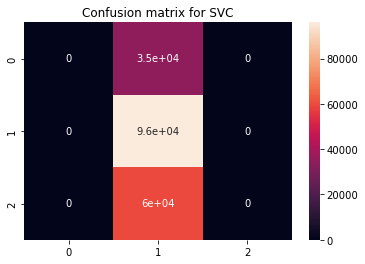

In [8]:
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

lr = SVC()

lr.fit(X_train, y_train)  

pred_lr = lr.predict(X_train)

cm_lr = metrics.confusion_matrix(y_train, pred_lr)

TN = cm_lr[0][0]
FP = cm_lr[0][1]
FN = cm_lr[1][0]
TP = cm_lr[1][1]

Total = TP + TN + FP + FN

acc_lr = (TP + TN) / Total * 100

Pre_lr = TP / (TP + FP) * 100

Sen_lr = TP / (TP + FN) * 100

f1_lr = (2 * Pre_lr * Sen_lr) / (Pre_lr + Sen_lr)

print("-------------------------------------------------")
print("Support Vector Machine ---> Performance Analysis    ")
print("-------------------------------------------------")
print()

print("1. Accuracy  =", acc_lr, '%')
print()

print("2. Precision =", Pre_lr, '%')
print()

print("3. Recall    =", Sen_lr, '%')
print()

print("4. F1-Score  =", f1_lr, '%')
print()

sns.heatmap(cm_lr, annot=True)
plt.title("Confusion matrix for SVC")
plt.show()

--------------------------------------
Correlation Plot
--------------------------------------


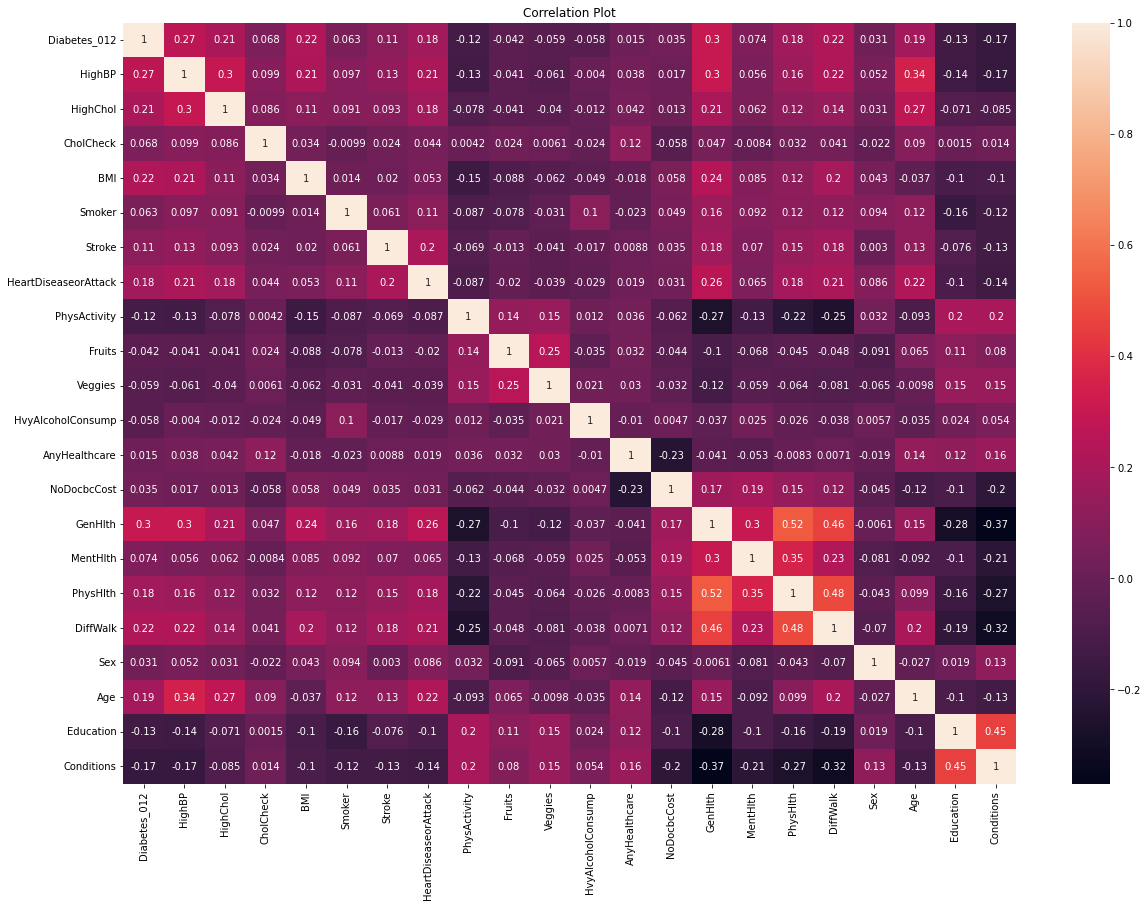

In [17]:
# === Correlation Plot ===
    
print("--------------------------------------")
print("Correlation Plot")
print("--------------------------------------")

corr_matrix = dataframe.corr()
plt.figure(figsize=(20, 14))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Plot")
plt.show()

--------------------------------------
Model Comparison Plot
--------------------------------------


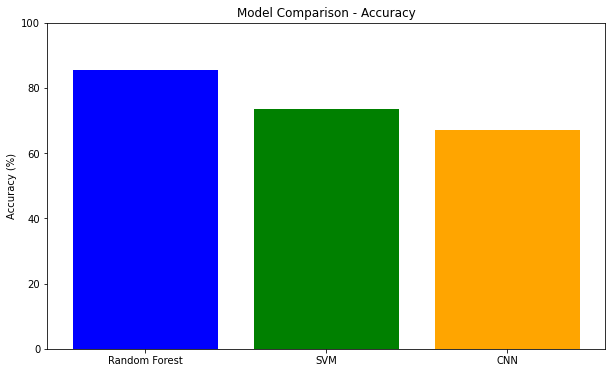

In [20]:
print("--------------------------------------")
print("Model Comparison Plot")
print("--------------------------------------")

models = ['Random Forest', 'SVM', 'CNN']
accuracies = [acc_rf, acc_lr, acc_cnn]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison - Accuracy')
plt.show()